<div class="alert alert-warning">

**Note:** If any `import` statements fail on a specific `package`, please use `pip install package` on the command line to install the missing package.

</div>

In [1]:
%matplotlib inline
import numpy as np

# Topological properties of genome-scale metabolic model

In this exercise you will analyze the topology of a Genome-Scale Model (GSM) of the yeast Saccharomyces cerevisiae using the methods described in Chapter 7 of "Systems Biology: Properties of Reconstructed Networks, Bernhard Ø. Palsson, 2006, Cambridge University Press". The GSM has the identifier iMM904 (MM -> Monica Mo, the main model developer and 1st author on its publication; 904 -> ORFs accounted for in the model) and was obtained from the Systems Biology Research Group (Mo, M.L., Palsson, B.O., Herrgard, M.J., Connecting extracellular metabolomic profiles to intracellular metabolic states in yeast. BMC Systems Biology. 3:37 (2009)).

## Loading a GSM using cobrapy

[Cobrapy](https://opencobra.github.io/cobrapy/) is a Python library that facilitates working with GSMs (import/export, simulations, etc.). While we'll make extensive use of it in future exercises, today we just needs it to load iMM904 from an [SBML](http://sbml.org/Main_Page) file and then to construct its stoichiometric matrix. Let's import iMM904 using the `read_sbml_function` and then take a look at some of its global properties.

In [2]:
from cobra.io import read_sbml_model

In [3]:
model = read_sbml_model('data/iMM904.xml')

In [4]:
model.metabolites.index(model.metabolites.atp_c)

313

If you evaluate the model inside a Jupyter notebook, you will be presented with a high-level overview of its contents.

In [5]:
model

Name,iMM904
Memory address,0x07f95cb222700
Number of metabolites,1226
Number of reactions,1577
Number of groups,58
Objective expression,1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090
Compartments,"cytosol, mitochondria, extracellular space, peroxisome/glyoxysome, endoplasmic reticulum, vacuole, nucleus, golgi apparatus"


For today's exercise it will also be important to access the metabolites and reactions contained in the model.

In [6]:
model.metabolites[0:10]

[<Metabolite 10fthf_c at 0x7f95bfb36160>,
 <Metabolite 10fthf_m at 0x7f95bfb36130>,
 <Metabolite 12dgr_SC_c at 0x7f95bfb36730>,
 <Metabolite 13BDglcn_c at 0x7f95bfb36850>,
 <Metabolite 13BDglcn_e at 0x7f95bfb36940>,
 <Metabolite 13dampp_c at 0x7f95bfb369a0>,
 <Metabolite 13dpg_c at 0x7f95bfb36a00>,
 <Metabolite 14glun_c at 0x7f95bfb36a30>,
 <Metabolite 16BDglcn_c at 0x7f95bfb36a60>,
 <Metabolite 1Dgali_c at 0x7f95bfb36a90>]

In [7]:
model.reactions[0:10]

[<Reaction 13BGH at 0x7f9620c4e040>,
 <Reaction 13BGHe at 0x7f9620ae69a0>,
 <Reaction 13GS at 0x7f9620ae6fa0>,
 <Reaction 16GS at 0x7f9620ae6f70>,
 <Reaction 23CAPPD at 0x7f9620ae6df0>,
 <Reaction 2DDA7Ptm at 0x7f9620ae6dc0>,
 <Reaction 2DHPtm at 0x7f9620ae6ac0>,
 <Reaction 2DOXG6PP at 0x7f9620ae6a60>,
 <Reaction 2HBO at 0x7f9620afed30>,
 <Reaction 2HBt2 at 0x7f9620ae6c70>]

As you can see `model.reactions` and `model.metabolites` behave just like lists so you can slice them. Furthermore, you can specific metabolite or reactions using their identifier (`atp_c` represents ATP in c(ytosol) compartment).

In [8]:
model.metabolites.get_by_id('atp_c')

Metabolite identifier,atp_c
Name,ATP
Memory address,0x07f9620eeff40
Formula,C10H12N5O13P3
Compartment,c
In 149 reaction(s),"ATPS, FRUK, SLCBK2, PFK_3, CBPS, SLCBK1, ILETRS, SHKK, BACCL, ATPATF1, ASPTRS, TMDK1, NDPK2, TYRTRS, ACCOAC, ATPH1, NDPK4, HEX7, ADSK, PI4P5K_SC, ATP2tp_H, DTMPK, PGK, VALTRS, ARGTRS, UMPK, ETHAK, ..."


## Construction and high-level analysis of stoichiometric matrix S

Now let's used the `create_stoichiometric_matrix` function to construct the stoichiometric matrix S in the form of a `numpy.array`.

In [9]:
from cobra.util import create_stoichiometric_matrix

In [10]:
S = create_stoichiometric_matrix(model)

If we check the `type` of $S$, we can see that it comes in the form of a `numpy.array`.

In [11]:
type(S)

numpy.ndarray

In [12]:
S

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.01, -1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.01,  0.  ,  0.  ]])

Checking its dimensions using `.shape`, we can see that it contains 1226 rows correspdonding to 1226 metabolites and 1577 columns (corresponding to 1577 reactions).

In [13]:
S.shape

(1226, 1577)

***
**A.**

Stoichiometric matrices are [sparse](https://en.wikipedia.org/wiki/Sparse_matrix) (i.e. most of its elements are zero). How sparse is $S$ of iMM904? Determine the percentage of non-zero elements in S.

Hint: There are many ways how of how one could count non-zero elements in a `numpy.array`. Try to find a concise and efficient approach.
***

In [30]:
count_0s = 0 
for i in range (0 , S.shape[0]):
    for j in range (0, S.shape[1]):
        if S[i,j] == 0:
            count_0s = count_0s + 1
        
non_zero_elements = S.shape[0]*S.shape[1]-count_0s
# Elements: 1,933,402. 0s: 1,926,885. Non-zero elements: 6517

# Percentage of non-zero elements in S:
(non_zero_elements/(S.shape[0]*S.shape[1]))*100
        

0.33707423494958627

***
**B.**

How many degrees of freedom does the model have? Can MFA be used to calculate fluxes on a genome-scale? Discuss with you're partner.

In [32]:
# Degrees of freedom: Number of columns minus the rank of the matrix

from numpy.linalg import matrix_rank
S.shape[1] - matrix_rank(S)

431

In [34]:
# With MFA you would then have to measure 431 fluxes to be able to calculate the rest. 
# This is too much, and therefore not suitable on genome-scale.

***

Now let's visualize $S$ using [matplotlib.pyplot.spy](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.spy.html), a function that can be used to create an image of a sparse matrix (it will emphasize non-zero elemements so one can see patterns etc.; you can vary the highlighting by changing `markersize`).

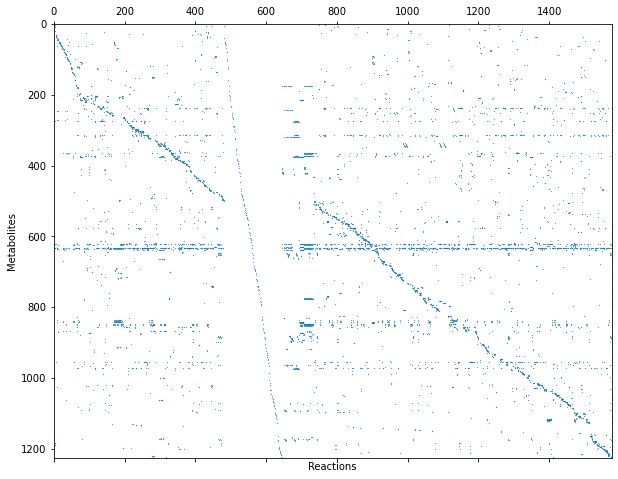

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.spy(S, precision=0.01, markersize=0.2)
plt.xlabel('Reactions')
plt.ylabel('Metabolites')
plt.show()

***
**C.**

One can see patterns in the visualization. Discuss with you're partner:

1. What are the horizontal lines? Which metabolites do you think they might be? Try to come up with suggestions for the heaviest lines, less heavy and the most dotted lines.
2. What is the diagonal line?
***

In [41]:
# 1. Horisontal lines are metabolites participating in most reactions. They are probably ATP/ADP, NAD+/NADH,
# H2O and the like.

# 2. The diagonal line idk. Maybe conversion of one metabolite in the beginning through many reactions where it
# is converted to a new metabolite each time. Could be uptake of glucose its catabolic pathway.


#Answer:
#1. Metabolites appearing in many reactions. Heaviest lines correspond to H+, ATP, H20, NADH, etc. 
# Less heavy lines correspond to typical precursor metabolites (pyruvate etc.). Most dotted lines 
#2. Linear biosynthetic pathways. Only visible due to reactions being ordered in a certain way.

## Analyze the network topology of the GSM as described in Chapter 7 of "Systems Biology: properties of reconstructed networks"

### Construct the binary $\mathbf{\hat{S}}$

Before we can compute the reaction $\mathbf{A_v}$ and compound $\mathbf{A_x}$ adjacency matrices, we need to create a binary version $\mathbf{\hat{S}}$ of $\mathbf{S}$.
\begin{array}
\\
\hat{S}_{ij} = 0 & \text{if} & S_{ij} = 0 \\
\hat{S}_{ij} = 1 & \text{if} & S_{ij} \neq 0
\end{array}

***
**D.**

Read the documentation of [`numpy.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to determine how to use it to create $\mathbf{\hat{S}}$. Specifically the examples at the end should be helpful.

In [45]:
S_bin = np.where(S != 0, 1., 0.)
# Function: here you determine that if S elemtent is not 0 is a true condition, it should be 1.
# Otherwise it should be 0. 

***

### Compute reaction and compound adjacency matrices

***
**E.**

Based on the book chapter and the lecture, 

1. Compute the reaction and compound adjacency matrices $\mathbf{A_v}$ and $\mathbf{A_x}$ (name them `A_v` and `A_x`).
2. Based on $\mathbf{A_v}$, what is reaction that involves the largest number or metabolites?
3. Based on $\mathbf{A_x}$, what is metabolite that participates in largest number of reactions.


Hints:
* You can transpose an array using `.T`.
* You can use `.max()` to find the maximum value inside an array.
* You can use `.argmax()` to find the position of the maximum value in an array.

In [48]:
# 1. A_v = dot product of S_bin transposed and S_bin
#    A_x = dot product of S_bin and S_bin transposed
S_bin_T = S_bin.T
A_v = S_bin_T.dot(S_bin)
A_x = S_bin.dot(S_bin_T)


In [52]:
# 2. Reaction w largest number metabolites 
A_v.argmax()%(A_v.shape[0])

1576

In [56]:
model.reactions[A_v.argmax()%(A_v.shape[0])]

Reaction identifier,BIOMASS_SC5_notrace
Name,Biomass SC5 notrace
Memory address,0x07f961784cca0
Stoichiometry,1.1348 13BDglcn_c + 0.4588 ala__L_c + 0.046 amp_c + 0.1607 arg__L_c + 0.1017 asn__L_c + 0.2975 asp__L_c + 59.276 atp_c + 0.0447 cmp_c + 0.0066 cys__L_c + 0.0036 damp_c + 0.0024 dcmp_c + 0.0024 dgmp... 1.1348 1 3 beta D Glucan C6H10O5 + 0.4588 L-Alanine + 0.046 AMP + 0.1607 L-Arginine + 0.1017 L-Asparagine + 0.2975 L-Aspartate + 59.276 ATP + 0.0447 CMP + 0.0066 L-Cysteine + 0.0036 DAMP + 0.0024 D...
GPR,
Lower bound,0.0
Upper bound,999999.0


In [54]:
# 3. Metabolite in largest number of reactions
A_x.diagonal().argmax()

632

In [55]:
# 3. men egen metode
A_x.argmax()%(A_x.shape[0])

632

In [59]:
model.metabolites[A_x.diagonal().argmax()]

Metabolite identifier,h_c
Name,H+
Memory address,0x07f9620e56e20
Formula,H
Compartment,c
In 539 reaction(s),"PLBPC_SC, CHTNDA, HMGCOAR, ACHLE3, ARGt2m, PIt2v, SULR, L_LACt2r, MIP2C126PLC_SC, ASNt2m, UTPH1, MIP2C226PLC_SC, ATPATF2, TREt2v, ERGSTESTH_SC, MIP2C224PLC_SC, CYOR_u6m, TMN, ASNt6, TRE6PS, UREA2t2..."


***
**F.**

Reproduce Fig. 7.3

Hint: You can use Python's `sorted` function to sort an array. Check out its documentation to see how to achieve either a descending or ascending order.

In [60]:
connectivities = A_x.diagonal() # How many reactions do each metabolite participate in

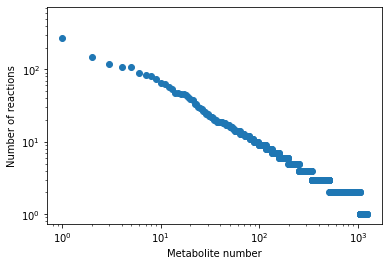

In [61]:
plt.loglog(sorted(connectivities, reverse=True), 'o') # reverse=True means sorted from high to low
plt.xlabel('Metabolite number')
plt.ylabel('Number of reactions')
plt.show()

***

Let's use Python's `zip` and `sorted` to extract the top 10 most connected metabolites.

In [62]:
connectivity = sorted(zip(model.metabolites, A_x.diagonal()), key=lambda item: item[1], reverse=True)
connectivity[0:10]

[(<Metabolite h_c at 0x7f9620e56e20>, 539.0),
 (<Metabolite h2o_c at 0x7f9620e56460>, 274.0),
 (<Metabolite atp_c at 0x7f9620eeff40>, 149.0),
 (<Metabolite h_m at 0x7f9620e56280>, 120.0),
 (<Metabolite pi_c at 0x7f9620d36850>, 109.0),
 (<Metabolite adp_c at 0x7f9620f40ac0>, 107.0),
 (<Metabolite h_e at 0x7f9620e56f40>, 89.0),
 (<Metabolite nadp_c at 0x7f9620d65a00>, 84.0),
 (<Metabolite nadph_c at 0x7f9620d65be0>, 81.0),
 (<Metabolite ppi_c at 0x7f9620d36ee0>, 73.0)]

## Using networkx to analyze the network

[NetworkX](https://networkx.github.io/) is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. In this part of the exercise we are going to use it visualize reactions and metabolite centric networks. We are also going to analyze the degree distribution of the nodes in those networks.

In [63]:
import networkx as nx

### Generate networks from the adjacency matrices

We can use `networkx.from_numpy_matrix` to create a network directly from an adjacency matrix. Let's create a metabolite centric network. In that process a network will be generated in which metabolites are connected to other metabolites if they participate in the same reaction. The off-diagonal elements of $\mathbf{A_x}$ provide this information which networkx then uses to construct the network.

In [64]:
compound_centric_network = nx.from_numpy_matrix(A_x)

Let's name those nodes in the network after the metabolites in the model.

In [65]:
mapping = dict(zip(range(0, len(model.metabolites)), model.metabolites))
compound_centric_network = nx.relabel_nodes(compound_centric_network, mapping)

### Compute node degrees for reaction and compound centric networks

We can use networkx's `.degree()` function to extract the number of connections ("the degree") each node in the network has.

In [66]:
metabolite_degrees = compound_centric_network.degree()

In [67]:
sorted_metabolite_degrees = sorted(metabolite_degrees, key=lambda item: item[1], reverse=True)
sorted_metabolite_degrees[0:10]

[(<Metabolite h_c at 0x7f9620e56e20>, 661),
 (<Metabolite h2o_c at 0x7f9620e56460>, 387),
 (<Metabolite atp_c at 0x7f9620eeff40>, 272),
 (<Metabolite h_m at 0x7f9620e56280>, 203),
 (<Metabolite pi_c at 0x7f9620d36850>, 203),
 (<Metabolite adp_c at 0x7f9620f40ac0>, 196),
 (<Metabolite h_e at 0x7f9620e56f40>, 189),
 (<Metabolite ppi_c at 0x7f9620d36ee0>, 165),
 (<Metabolite nadp_c at 0x7f9620d65a00>, 144),
 (<Metabolite nadph_c at 0x7f9620d65be0>, 141)]

***
**G. (optional)** 

If you compare the degrees from the metabolite centric network with the diagonal entries of $\mathbf{A}_x$ (connectivey analysis above), they seem to be similar but not the same. What is the difference between the connectivity analysis conducted above (based on Chapter 7 of "Systems Biolog: properties of reconstructed networks") and node degrees computed here?
***

In [ ]:
# Answer: the diagonal entries of  𝐀𝑥  only indicate in how many reactions the metabolites participate in. 
# The degrees as computed by .degree() indicate the number of other metabolites a metabolite is connected. 
# This is not the same thing (consider a reaction with multiple substrates and products for example).

### Visualize the network

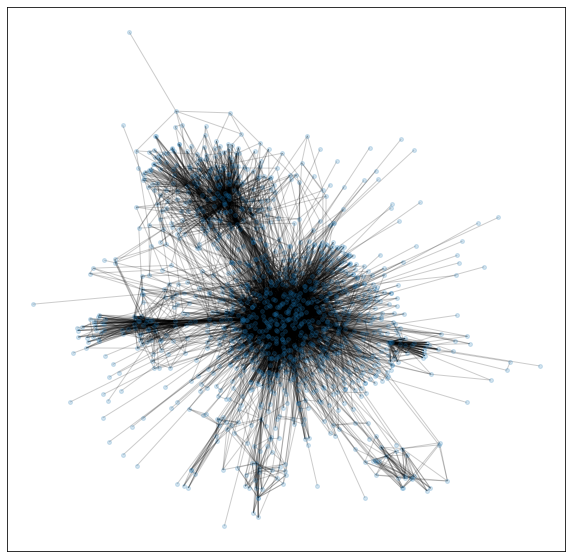

In [68]:
plt.figure(figsize=(10, 10))
nx.draw_networkx(compound_centric_network, node_size=15, alpha=.2, with_labels=False)

Look at that hairball!

***
**F. (optional)**

1. In the hairball one can see groups of nodes/metabolites clustering together. What do those groups correspond to? Discuss with your partner.
2. Do you see ways of making the visualization less hairbally? Discuss with your partner.

Hint:
* You can use `network.remove(node)` to delete a specific node from the network. 
* You can use max(nx.connected_component_subgraphs(network), key=len) to find the largest connected component of network.

Answer: the clusters correspond to the different cellular compartments represented in the model.
***

In [69]:
# 1. Answer: the clusters correspond to the different cellular compartments represented in the model.
